In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import make_scorer, r2_score

In [2]:
# Load data
path = '/Users/rodrigovillatoro/Documents/Harbour.Space/07_ml_1/data/winequality-red.csv'

names = [
    'fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

red = pd.read_csv(path, sep=';')

In [3]:
# Check everything is ok
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Extract X and Y
y = red['quality']
red = red.drop(['quality'], axis=1)

In [5]:
# Normalize X
min_max_scaler = MinMaxScaler()
red_scaled = min_max_scaler.fit_transform(red)
red_normalized = pd.DataFrame(red_scaled, columns=red.columns)

## First, just visualize results for 1 variable

In [6]:
columns = red_normalized.columns

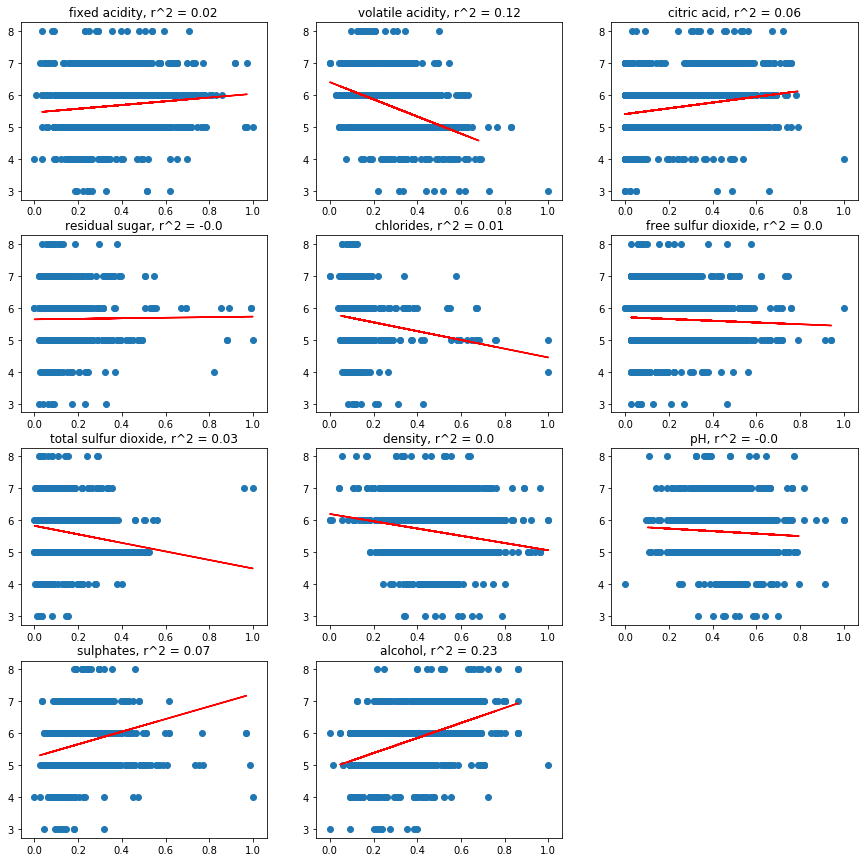

In [7]:
fig = plt.figure(figsize=(15, 15))
for i in range(len(columns)):
    
    X = red_normalized[columns[i]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    regressor = LinearRegression()
    regressor.fit(X_train.values.reshape(-1, 1), y_train)
    predictions = regressor.predict(X_test.values.reshape(-1, 1))
    r_squared = round(regressor.score(X_test.values.reshape(-1, 1), y_test), 2)
    
    ax = fig.add_subplot(4, 3, i + 1)
    ax.set_title('{}, r^2 = {}'.format(columns[i], r_squared))
    ax.scatter(X, y)
    ax.plot(X_test, predictions, color='red')
    
    
plt.show()

#### From above, we can see that, individually, the features that best predict the quality are:
- alcohol (r_squared of 0.23)
- volatile acidity (r_squared of 0.12)
- sulphates (r_squared of 0.07)

## Let's fit a linear regression that includes all features

In [8]:
# Train, tests splits
X_train, X_test, y_train, y_test = train_test_split(red_normalized, y, random_state=1)

# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
r_squared = round(regressor.score(X_test, y_test), 2)
print(r_squared)
print(regressor.coef_)

0.34
[ 0.47129376 -1.70336649 -0.25650776  0.26253332 -1.07080986  0.34991681
 -1.00516159 -0.48287323 -0.48897369  1.47580562  1.71521316]


## Let's fit a linear regression that includes only 3 selected features

In [9]:
red_selected = red_normalized[['alcohol', 'volatile acidity', 'sulphates']]

In [10]:
# Train, tests splits
X_train, X_test, y_train, y_test = train_test_split(red_selected, y, random_state=1)

# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
r_squared = round(regressor.score(X_test, y_test), 2)
print(r_squared)
print(regressor.coef_)

0.33
[ 2.00200109 -1.88692349  1.06555298]


### By using only three, features, we are still able to achieve very similar r^2: 
- Using all features = 0.34
- Using 3 most important = 0.33

-----

## Using Polynomial Features, just for alcohol

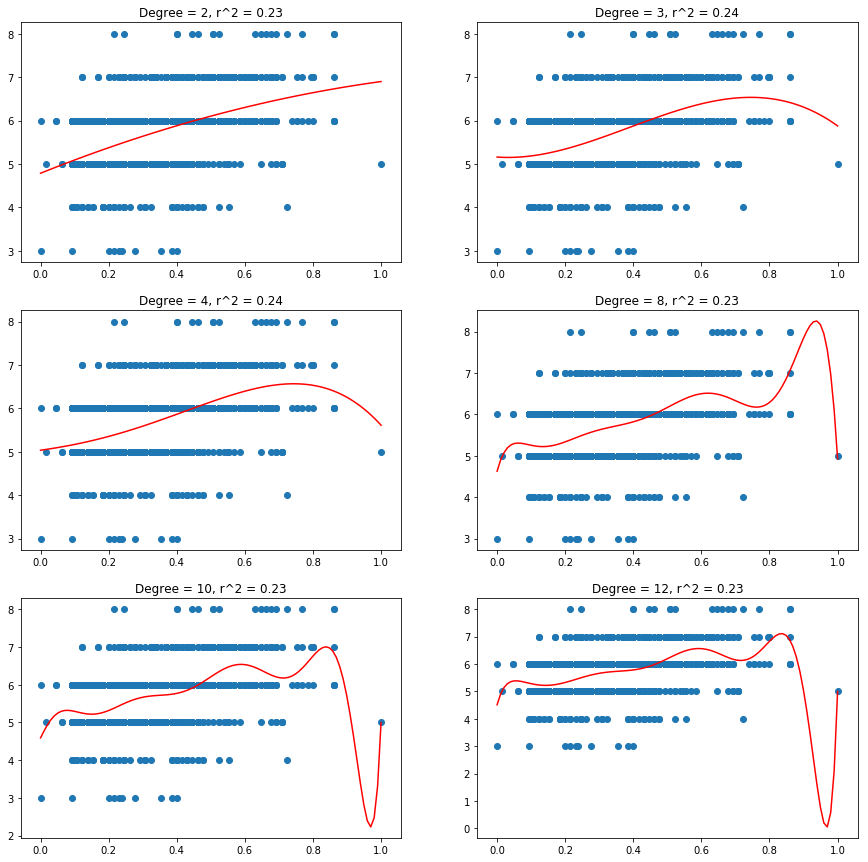

In [11]:
# Filter only for alcohol
alcohol = red_normalized['alcohol']

num_features = [2, 3, 4, 8, 10, 12]
fig = plt.figure(figsize=(15, 15))

for i, num in enumerate(num_features):
    
    poly = PolynomialFeatures(num)
    transformed = poly.fit_transform(alcohol.values.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(transformed, y, random_state=1)
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    r_squared = round(regressor.score(X_test, y_test), 2)
    
    x = np.linspace(0, 1, 100)
    x_transformed = poly.fit_transform(x.reshape(-1, 1))
    predictions = regressor.predict(x_transformed)

    ax = fig.add_subplot(3, 2, i + 1)
    ax.set_title('Degree = {}, r^2 = {}'.format(num, r_squared))
    ax.scatter(alcohol, y)
    ax.plot(x, predictions, color='red')
    
plt.show()

## Using Polynomial Features, best 3 features

In [12]:
# Filter only the best 3 features
red_selected = red_normalized[['alcohol', 'volatile acidity', 'sulphates']]
degrees = range(1, 8)
scores = []

for i, num in enumerate(degrees):
      
    poly = PolynomialFeatures(num)
    transformed = poly.fit_transform(red_selected)

    X_train, X_test, y_train, y_test = train_test_split(transformed, y, random_state=1)
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    r_squared = round(regressor.score(X_test, y_test), 2)
    scores.append(r_squared)


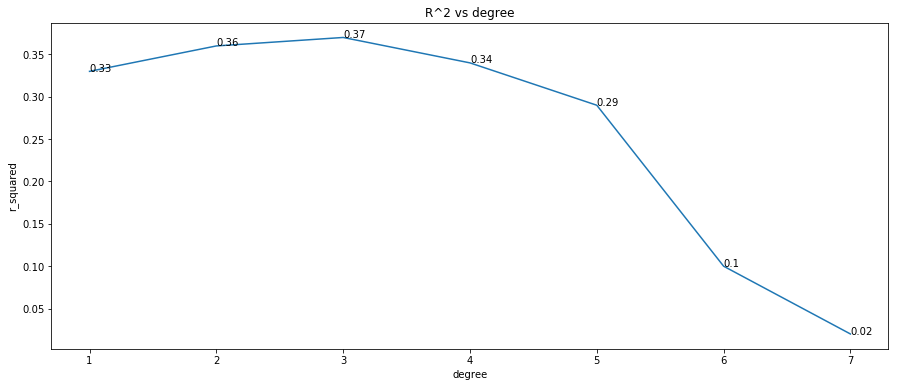

In [13]:
plt.figure(figsize=(15, 6))

plt.title('R^2 vs degree')
plt.plot(degrees, scores)
plt.ylabel('r_squared')
plt.xlabel('degree')

for i, xy in enumerate(zip(degrees, scores)):
    plt.annotate('{}'.format(scores[i]), xy)

plt.show()

#### The best r^2 is with 3 polynomial features, but it is still quite low (37%)

## Using Polynomial Features, with regularization

In [14]:
scorer = make_scorer(r2_score)
degrees = range(1, 8)
alphas = [10, 1, 0.1, 0.01, 0.001]

def get_best_parameters(Regularization):
    '''
    Return best degree and alpha for a particular regularization model.  
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(red_selected, y, random_state=1)

    parameters = {
        'poly__degree': degrees,
        'reg__alpha': alphas
    }

    pipeline = Pipeline([
            ('poly', PolynomialFeatures()),
            ('reg', Regularization(random_state=1))
        ])

    grid_search = GridSearchCV(pipeline, parameters, scoring=scorer)
    grid_search.fit(X_train, y_train)
    best_parameters = grid_search.best_estimator_.get_params()

    print('BEST PARAMETERS')
    print('degree', best_parameters['poly__degree'])
    print('alpha', best_parameters['reg__alpha'])
    
    return best_parameters['poly__degree'], best_parameters['reg__alpha']

In [15]:
def plot_with_degree_constant_at(degree, Regularization):
    '''
    Plots the R^2 as a function of the alpha, keeping the degree constant at best parameter. 
    '''
    

    # Filter only the best 3 features
    red_selected = red_normalized[['alcohol', 'volatile acidity', 'sulphates']]
    scores = []

    for i, num in enumerate(alphas):

        poly = PolynomialFeatures(degree)
        transformed = poly.fit_transform(red_selected)

        X_train, X_test, y_train, y_test = train_test_split(transformed, y, random_state=1)

        regressor = Regularization(alpha=num, random_state=1)
        regressor.fit(X_train, y_train)
        r_squared = round(regressor.score(X_test, y_test), 2)
        scores.append(r_squared)


    plt.figure(figsize=(12, 4))

    plt.plot(np.log(alphas), scores)
    plt.ylabel('r_squared')
    plt.xlabel('Log alpha')
    plt.title('Degree constant at {} (best parameter)'.format(degree))

    for i, xy in enumerate(zip(np.log(alphas), scores)):
        plt.annotate('{}'.format(scores[i]), xy)

    plt.show()

In [16]:
def plot_with_alpha_constant_at(alpha, Regularization):
    '''
    Plots the R^2 as a function of the degree, keeping the degree constant at best parameter. 
    '''

    # Filter only the best 3 features
    red_selected = red_normalized[['alcohol', 'volatile acidity', 'sulphates']]
    degrees = range(1, 8)
    scores = []

    for i, num in enumerate(degrees):

        poly = PolynomialFeatures(num)
        transformed = poly.fit_transform(red_selected)

        X_train, X_test, y_train, y_test = train_test_split(transformed, y, random_state=1)

        regressor = Regularization(alpha=alpha, random_state=1)
        regressor.fit(X_train, y_train)
        r_squared = round(regressor.score(X_test, y_test), 2)
        scores.append(r_squared)

    plt.figure(figsize=(12, 4))

    plt.plot(degrees, scores)
    plt.ylabel('r_squared')
    plt.xlabel('degrees')
    plt.title('Alpha constant at {} (best parameter)'.format(alpha))

    for i, xy in enumerate(zip(degrees, scores)):
        plt.annotate('{}'.format(scores[i]), xy)

    plt.show()

## Ridge regularization

BEST PARAMETERS
degree 3
alpha 0.01


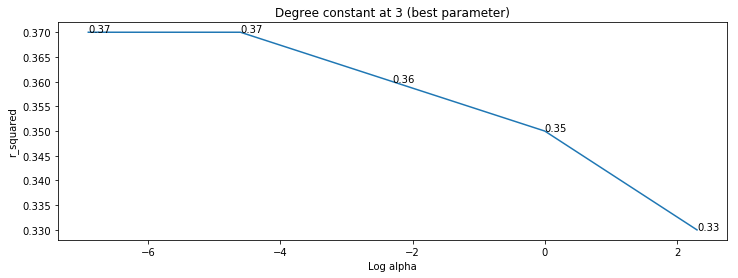

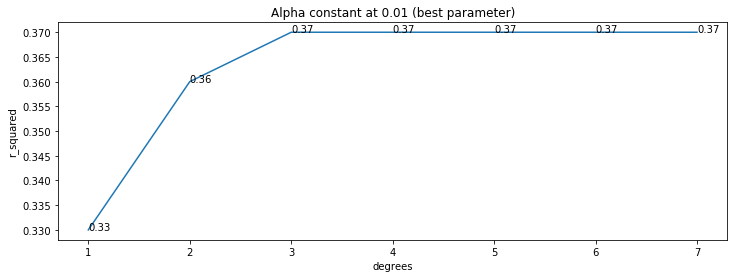

In [17]:
regularization = Ridge
best_degree, best_alpha = get_best_parameters(regularization)
plot_with_degree_constant_at(best_degree, regularization)
plot_with_alpha_constant_at(best_alpha, regularization)

## Lasso regularization

BEST PARAMETERS
degree 7
alpha 0.001


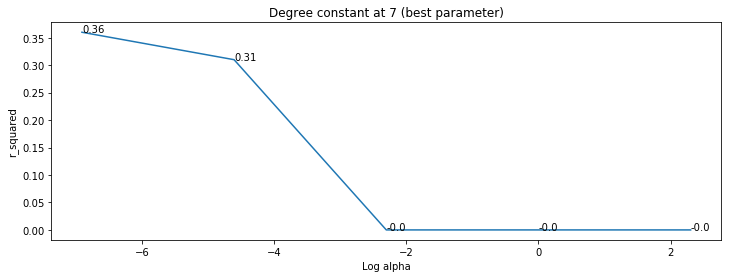

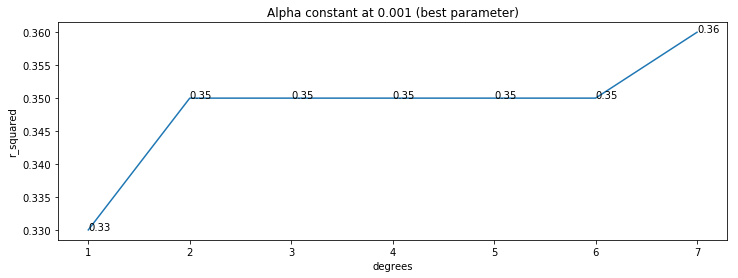

In [18]:
regularization = Lasso
best_degree, best_alpha = get_best_parameters(regularization)
plot_with_degree_constant_at(best_degree, regularization)
plot_with_alpha_constant_at(best_alpha, regularization)

## Elastic Net regularization

BEST PARAMETERS
degree 6
alpha 0.001


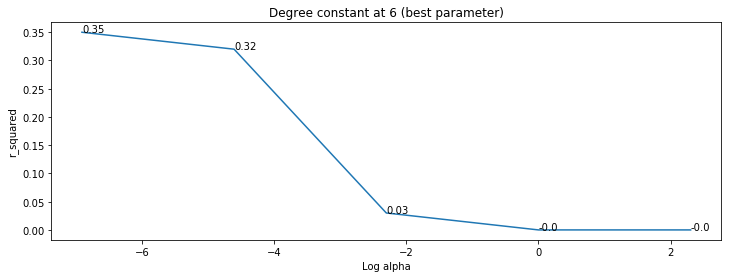

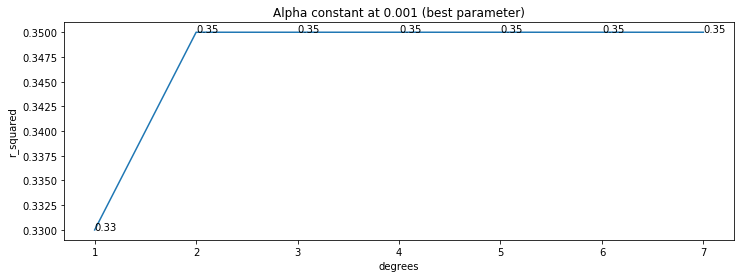

In [19]:
regularization = ElasticNet
best_degree, best_alpha = get_best_parameters(regularization)
plot_with_degree_constant_at(best_degree, regularization)
plot_with_alpha_constant_at(best_alpha, regularization)